In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statistics
import glob
import time

import analysis_pkg
%load_ext autoreload
%autoreload 2

In [7]:
mod_fit = analysis_pkg.fit_spec_years(2013,2018)
sep_full, grp_full = analysis_pkg.singleyear_multibase_analysis(2018, mod_fit)

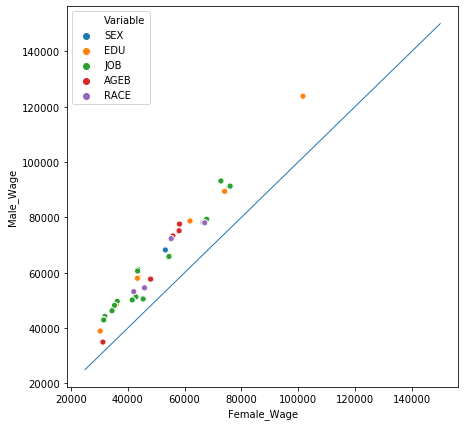

In [88]:
plt.figure(figsize=(7,7))
ax = sns.scatterplot(x="Female_Wage", y="Male_Wage", hue="Variable",data=grp_full)
plt.plot([25000,150000], [25000,150000], linewidth=1)

In [80]:
def plot_heatmap_basecat(grp_full, var, Male_or_Female):
    sex_ratio = ("%s_Ratio" % Male_or_Female)
    plt.figure(figsize=(7,7))
    heatmap_group = grp_full.loc[(grp_full.Variable == var)]
    heatmap_group = heatmap_group.pivot("Category", "Base_category", sex_ratio)
    heatmap_group['sum'] = heatmap_group.iloc[:, :].sum(axis=1)
    heatmap_group = heatmap_group.sort_values(by=['sum'], ascending=False)
    heatmap_group = heatmap_group.drop(columns=['sum'])
    heatmap_group = heatmap_group[list(heatmap_group.index)] #[::-1]
    ax = sns.heatmap(heatmap_group, annot=True, linewidths=.5, cbar=False)

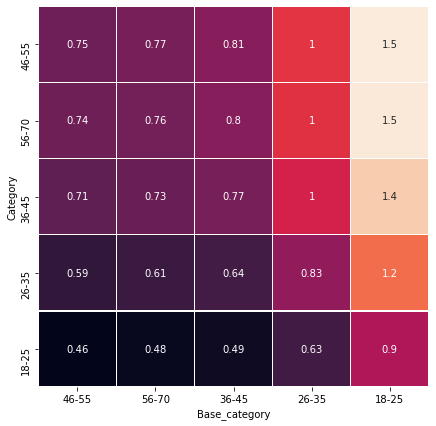

In [89]:
analysis_pkg.plot_heatmap_basecat(grp_full, 'AGEB', 'Female')

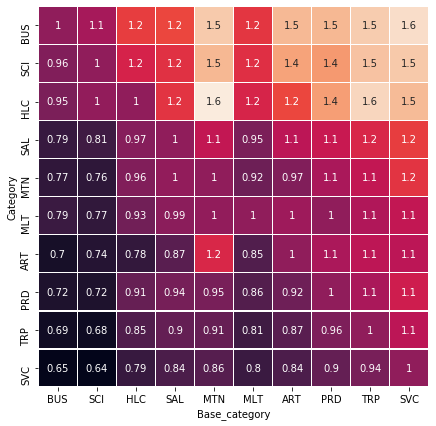

In [90]:
plot_heatmap_basecat(grp_full, 'JOB','Male')

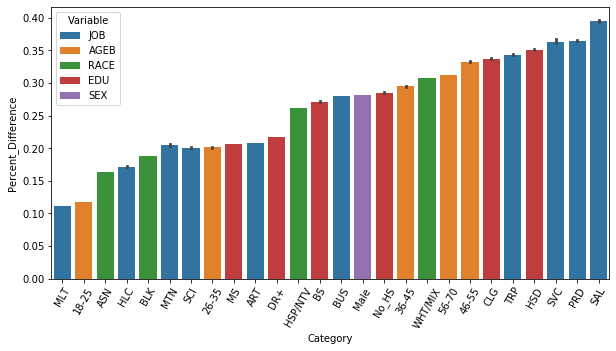

In [79]:
grp_full_sort = grp_full.sort_values(by=['Percent_Difference'])
grp_full_list = grp_full_sort['Category'].tolist()
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
g = sns.barplot(y="Percent_Difference", x="Category", dodge = False,
                hue='Variable', data=grp_full_sort)